In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('/content/14_ass5_Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [42]:
le = LabelEncoder()

In [43]:
m = MinMaxScaler()

#***Preprocessing***

In [44]:
# Null Values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
from sklearn import preprocessing

In [46]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.

In [47]:
df['Gender']= label_encoder.fit_transform(df['Gender'])

df['Gender'].unique()

array([1, 0])

Info about outliers

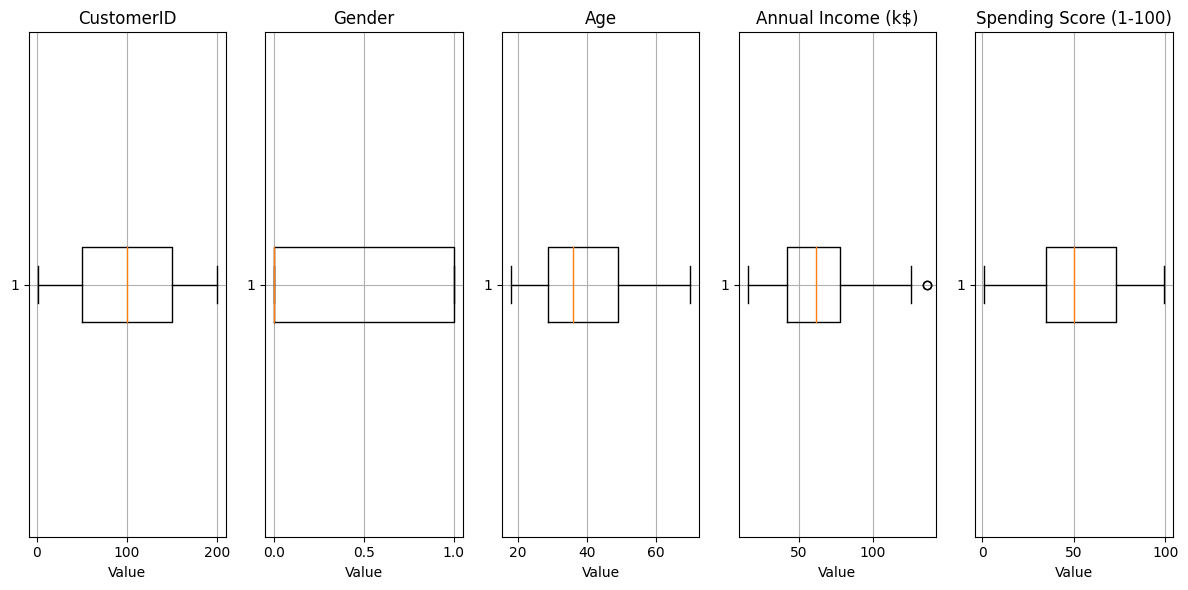

In [48]:
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.subplot(1, len(df.columns), df.columns.get_loc(column) + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
# As we can see there is an outlier in Annual Income

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [51]:
IQR = Q3 - Q1

In [52]:
data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

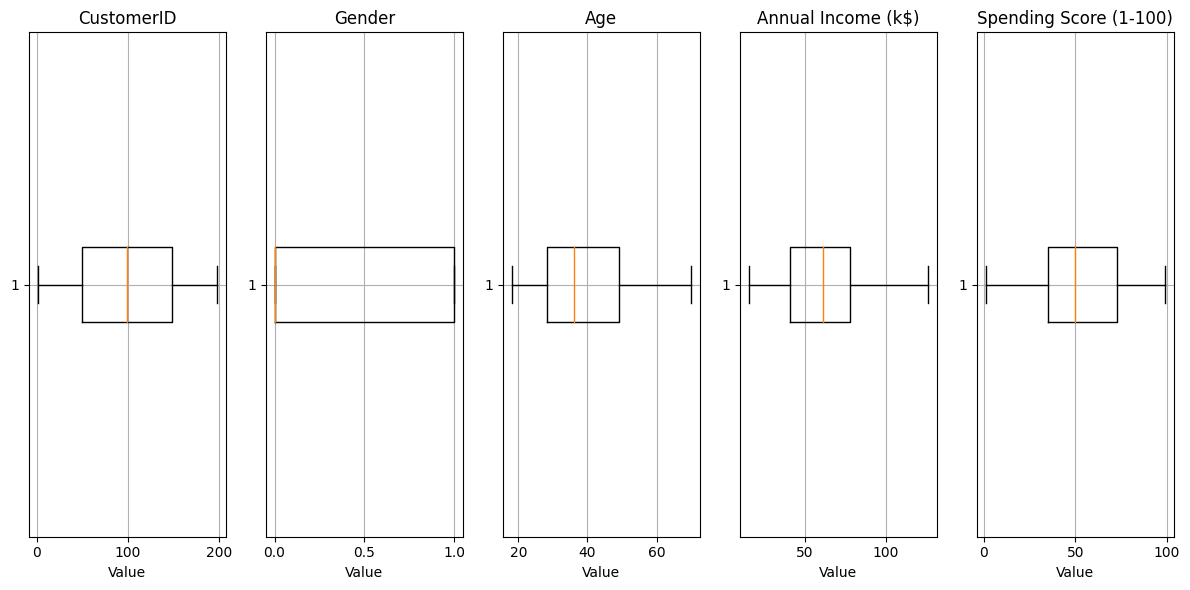

In [53]:
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.subplot(1, len(data.columns), data.columns.get_loc(column) + 1)
    plt.boxplot(data[column], vert=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.grid(True)

    plt.tight_layout()
plt.show()

In [54]:
# Outliers gone

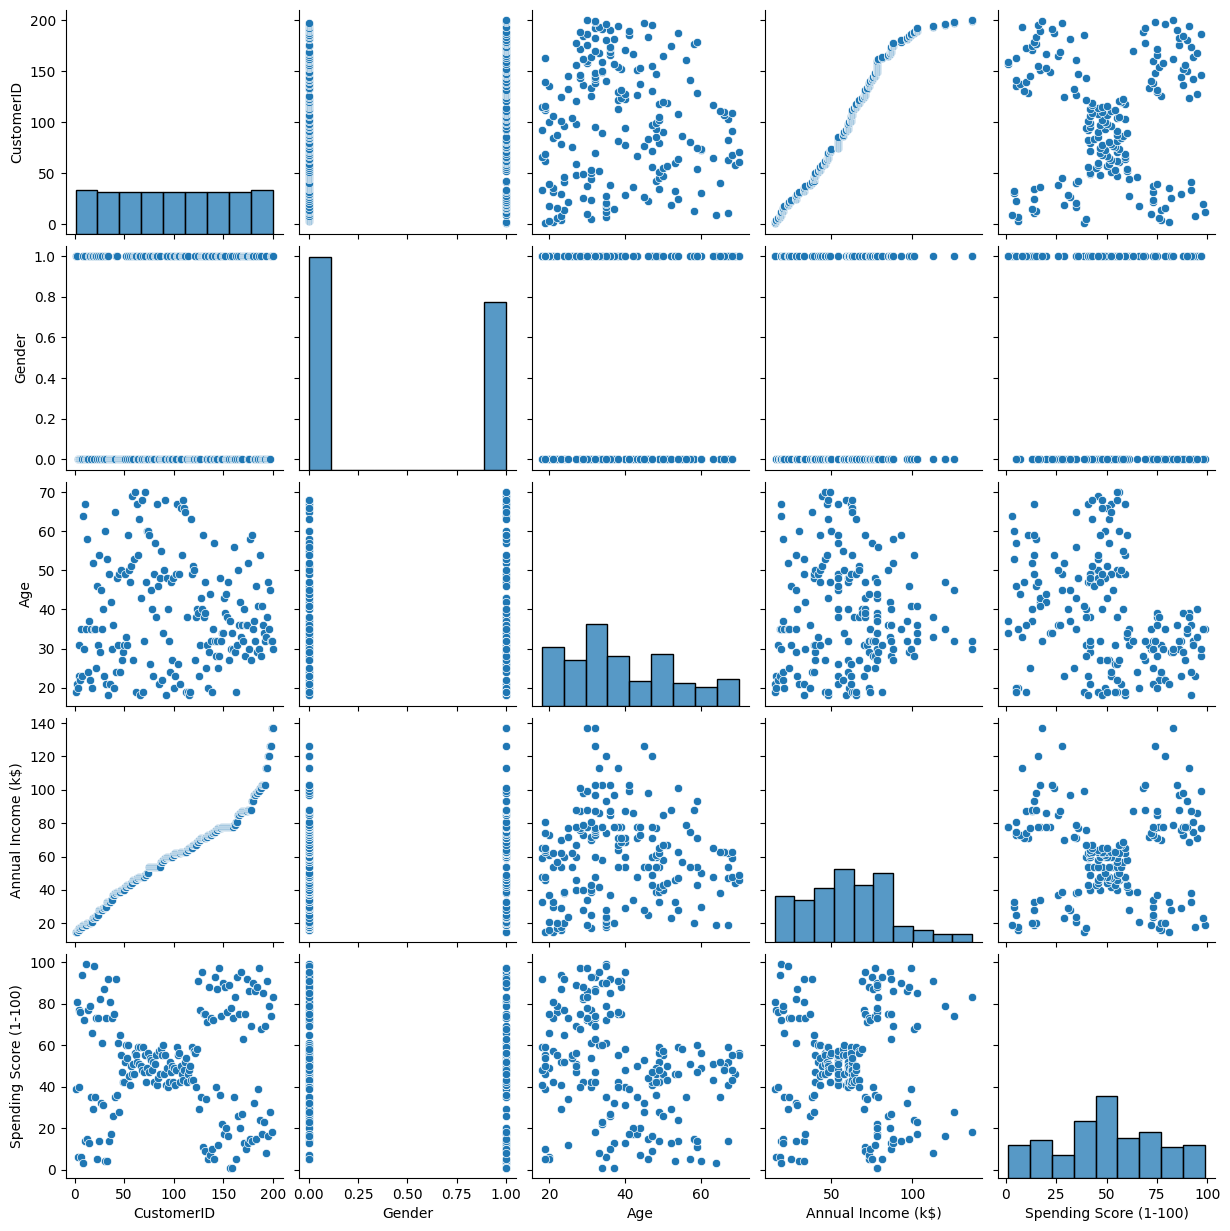

In [55]:
sns.pairplot(df)

<Axes: >

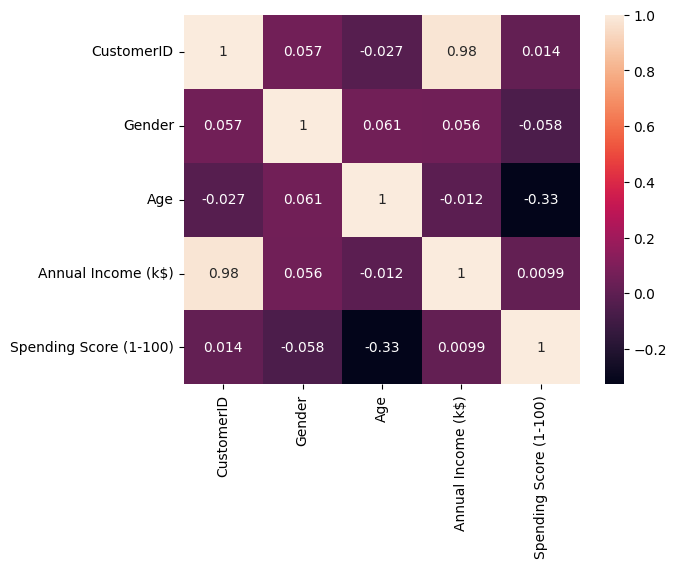

In [56]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

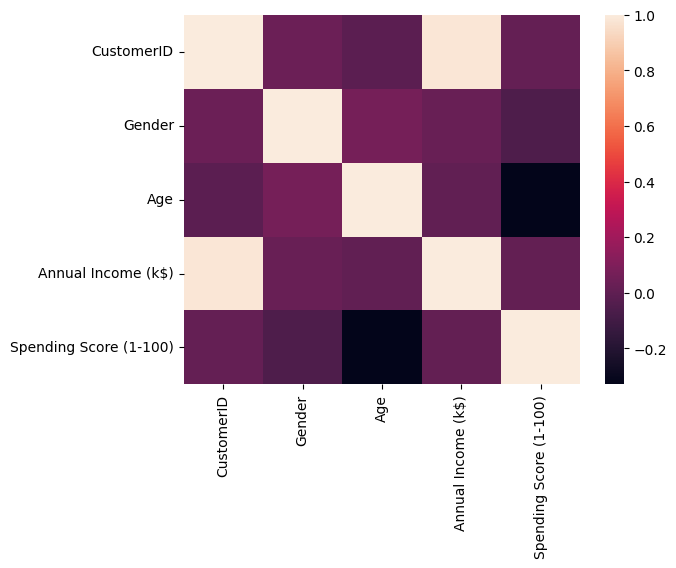

In [57]:
sns.heatmap(data.corr(), annot=False)

In [58]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [59]:
df.drop(['CustomerID'], axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [60]:
X = df.drop(['Spending Score (1-100)'], axis=1)
X.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [61]:
y = df['Spending Score (1-100)']
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
X_train.shape, X_test.shape

((160, 4), (40, 4))

#***Machine Learning with Clustering Algorithm***

In [62]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [63]:
# Generating synthetic data
data, _ = make_blobs(n_samples=198, centers=4, random_state=42)

In [64]:
# Creating a K-Means model with a specified number of clusters (K)
k = 4
kmeans = KMeans(n_clusters=k)

In [65]:
# Fitting the model to the data
kmeans.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [66]:
# Getting the cluster assignments for each data point
labels = kmeans.labels_

In [67]:
# Getting the coordinates of cluster centers
centers = kmeans.cluster_centers_

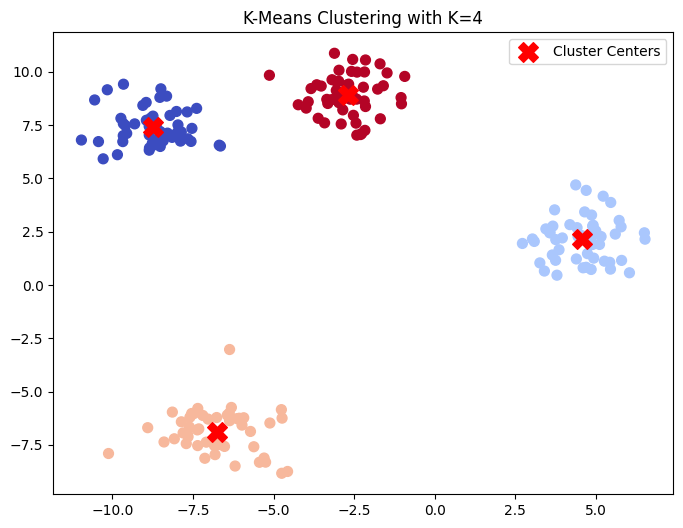

In [68]:
# Plotting the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title(f'K-Means Clustering with K={k}')
plt.legend()
plt.show()

#**--- The End ---**
#**- Yash Akolu (21BCE5780) ***